In [2]:
import pandas as pd

# Load a CSV file
data = pd.read_csv('C:/Users/HP/OneDrive/Desktop/ai/kaim-week-00/data/sierraleone-bumbuna.csv')





In [3]:
# Preview the data 
print(data.head())



          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [4]:
# check the data information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
#data description by different statstics
print(data.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [6]:
data.shape

print(data.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
# Check for missing values in the dataset
missing_values = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum()

print("Missing Values in Key Columns:")
print(missing_values)



Missing Values in Key Columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [8]:
# Check for negative values where only positive should exist
negative_values = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0

# Count negative values per column
negative_counts = negative_values.sum()

print("Negative Values in Key Columns:")
print(negative_counts)



Negative Values in Key Columns:
GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [9]:
# Replace negative values with NaN using DataFrame.apply
data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(
    lambda col: col.where(col >= 0)
)


In [10]:
# Check if there are any negative values left
print((data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum())

# Check for missing values
print(data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum())


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [11]:
from scipy.stats import zscore

# Calculate Z-scores for the specified columns
z_scores = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(zscore)

# Identify outliers
outliers = (z_scores.abs() > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 6630


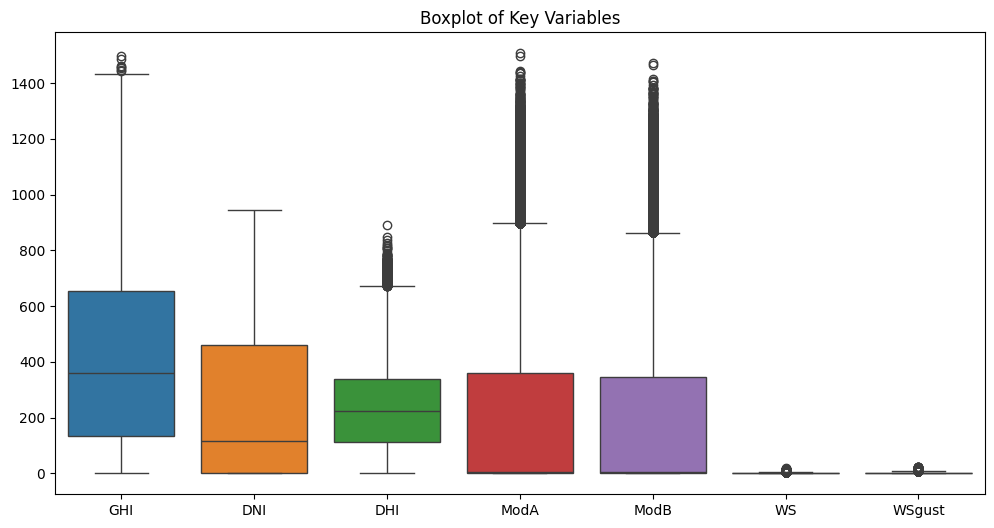

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
plt.title('Boxplot of Key Variables')
plt.show()


In [13]:
# Drop rows identified as outliers
data = data[~outliers]


In [14]:
# Check if all issues have been resolved
print("Updated Data Quality Check:")
print(data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum())
print("Any remaining negative values:", (data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum())


Updated Data Quality Check:
GHI       259381
DNI       263914
DHI       261357
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64
Any remaining negative values: GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


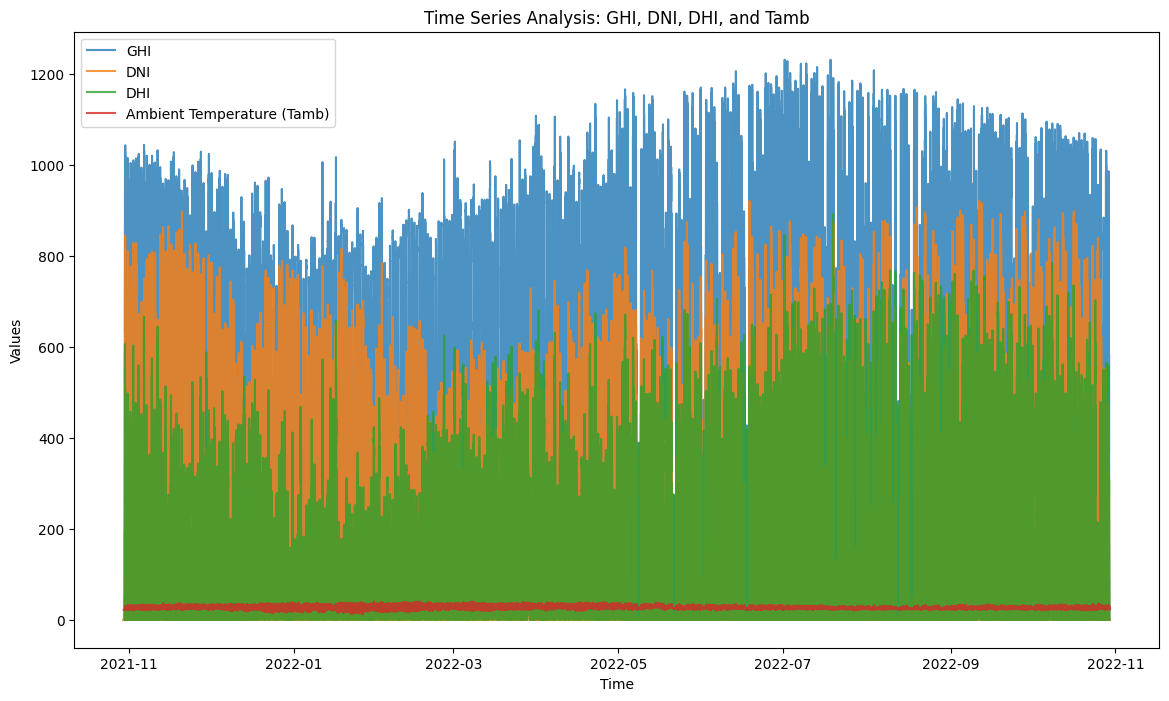

In [15]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as the index for easier plotting
data.set_index('Timestamp', inplace=True)

# Plot time series
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['GHI'], label='GHI', alpha=0.8)
plt.plot(data.index, data['DNI'], label='DNI', alpha=0.8)
plt.plot(data.index, data['DHI'], label='DHI', alpha=0.8)
plt.plot(data.index, data['Tamb'], label='Ambient Temperature (Tamb)', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Analysis: GHI, DNI, DHI, and Tamb')
plt.legend()
plt.show()


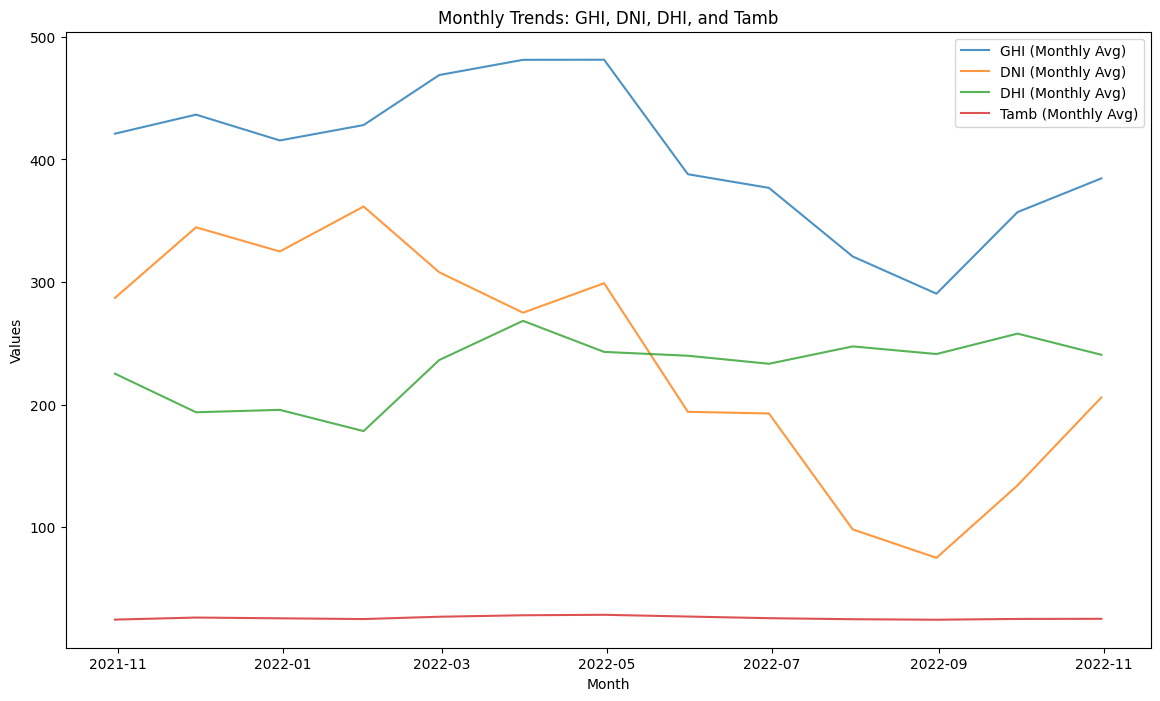

In [16]:
# Resample data by month-end and calculate the mean
monthly_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('ME').mean()

# Plot monthly trends
plt.figure(figsize=(14, 8))
plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI (Monthly Avg)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI (Monthly Avg)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI (Monthly Avg)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['Tamb'], label='Tamb (Monthly Avg)', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Trends: GHI, DNI, DHI, and Tamb')
plt.legend()
plt.show()


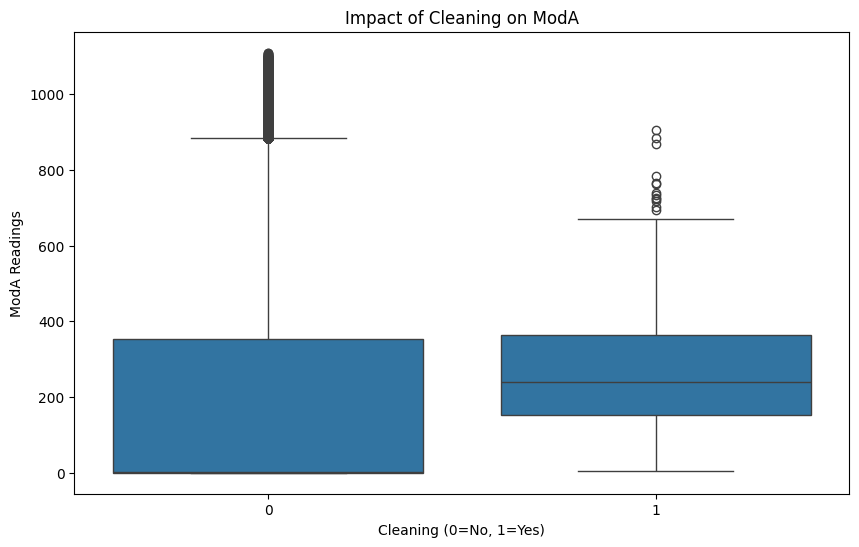

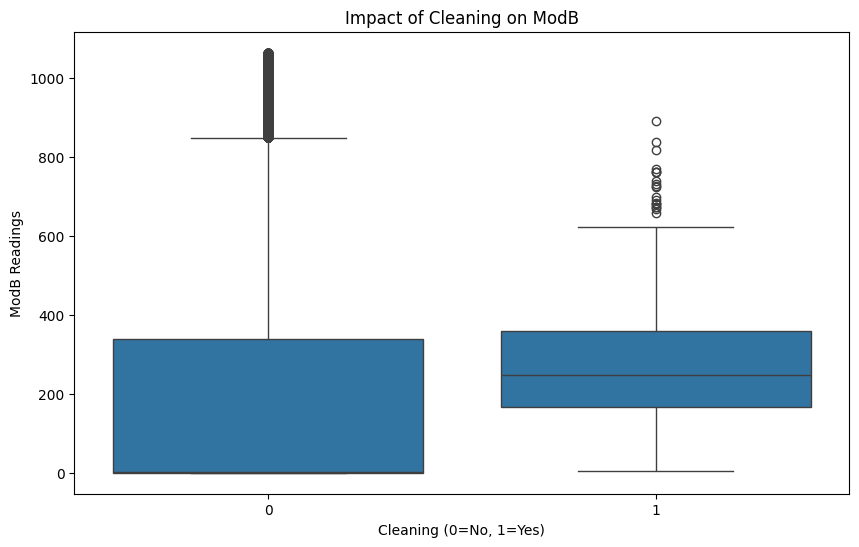

In [17]:
import seaborn as sns

# Boxplot for ModA
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Cleaning'], y=data['ModA'])
plt.xlabel('Cleaning (0=No, 1=Yes)')
plt.ylabel('ModA Readings')
plt.title('Impact of Cleaning on ModA')
plt.show()

# Boxplot for ModB
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Cleaning'], y=data['ModB'])
plt.xlabel('Cleaning (0=No, 1=Yes)')
plt.ylabel('ModB Readings')
plt.title('Impact of Cleaning on ModB')
plt.show()


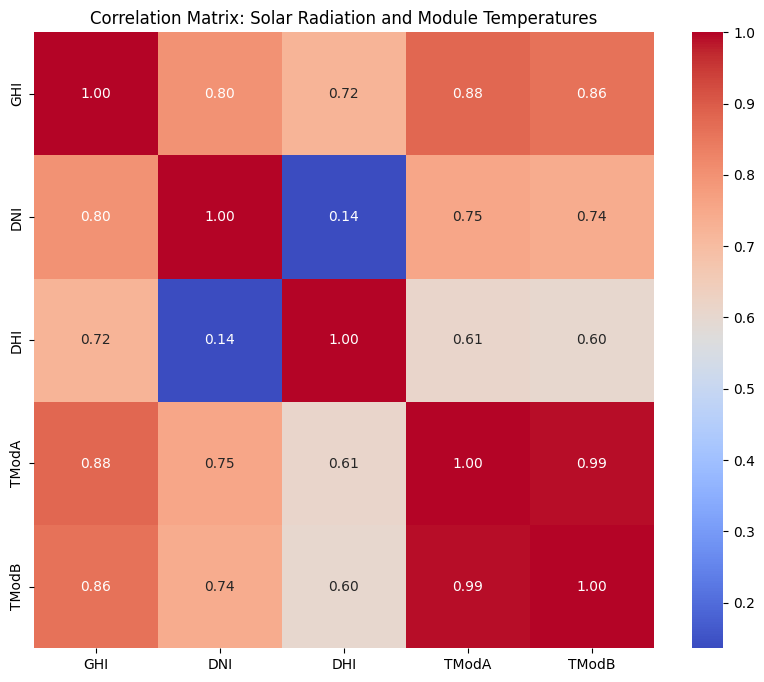

In [18]:
# Compute correlation matrix
correlation_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Solar Radiation and Module Temperatures')
plt.show()


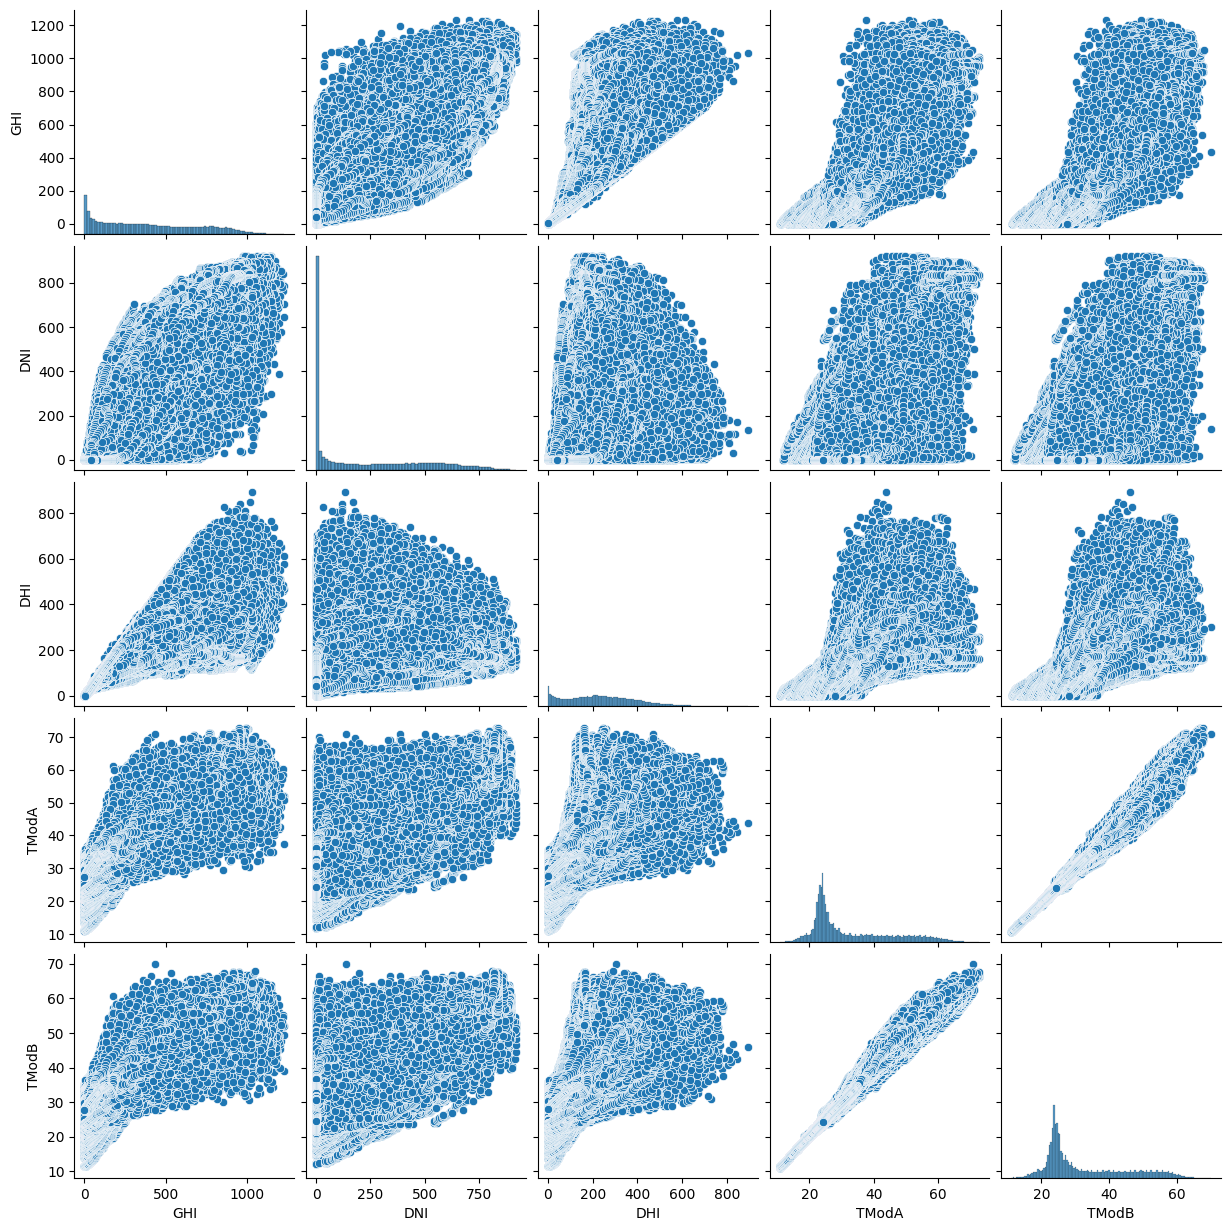

In [19]:
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.show()


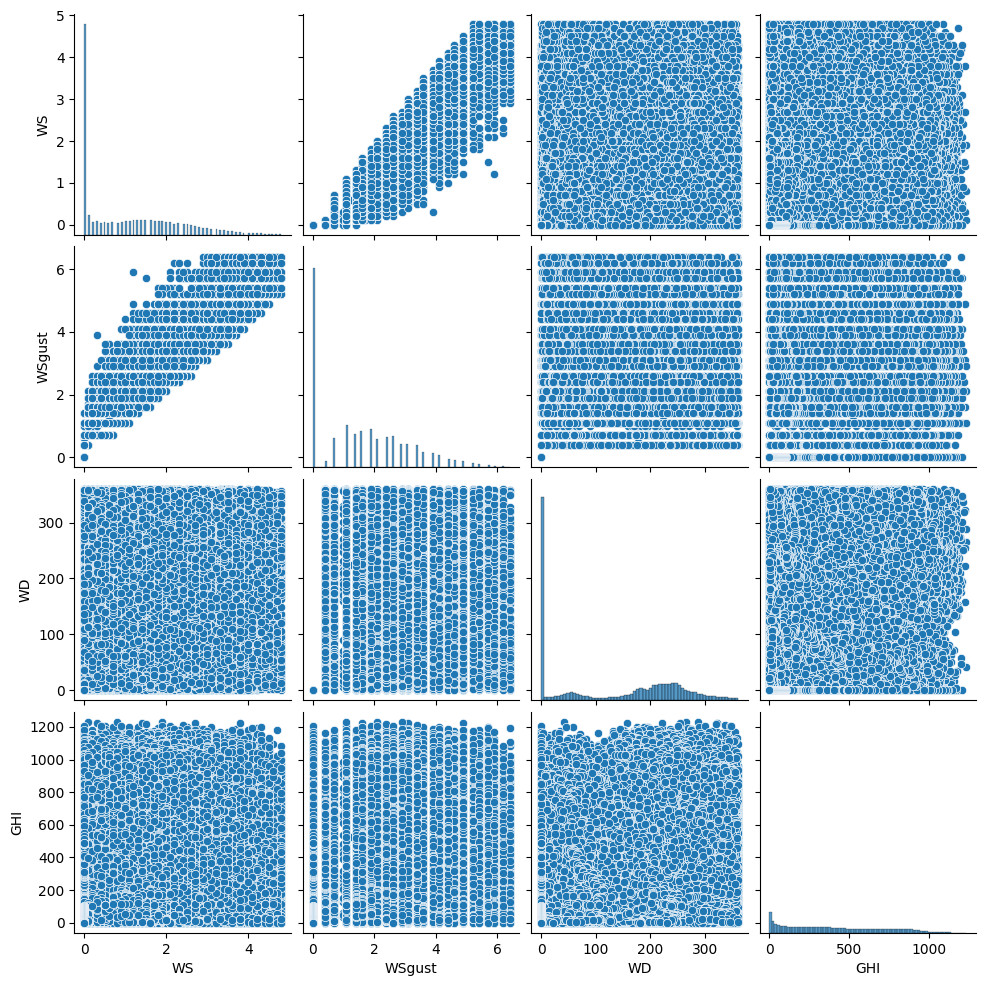

In [20]:
# Scatter matrix
sns.pairplot(data[['WS', 'WSgust', 'WD', 'GHI']])
plt.show()


<Figure size 800x800 with 0 Axes>

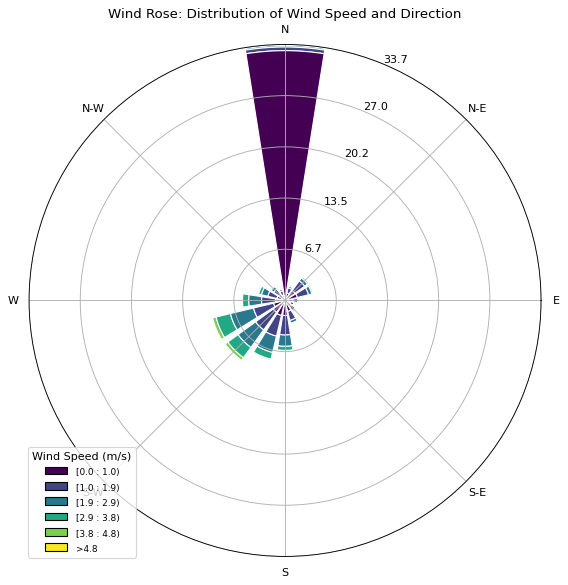

In [21]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create a wind rose plot
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose: Distribution of Wind Speed and Direction')
plt.show()


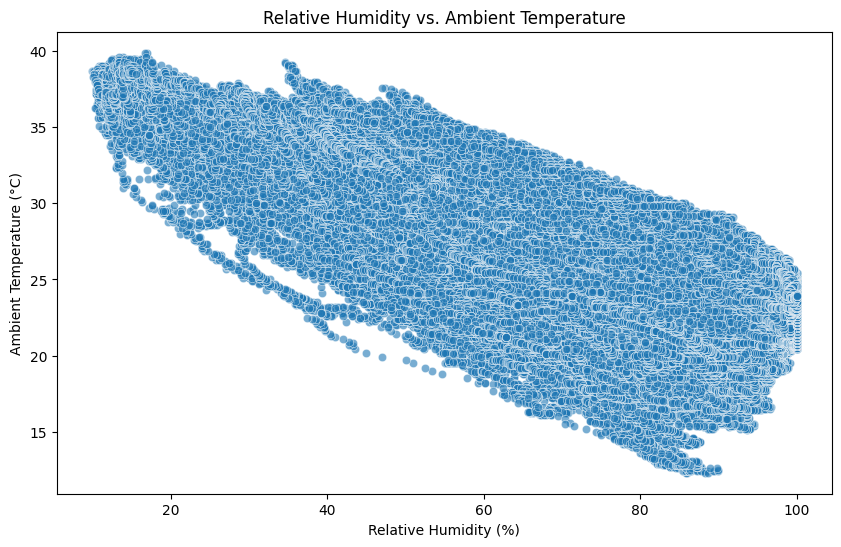

In [22]:
import seaborn as sns

# Scatter plot to observe the relationship between RH and Tamb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RH'], y=data['Tamb'], alpha=0.6)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()


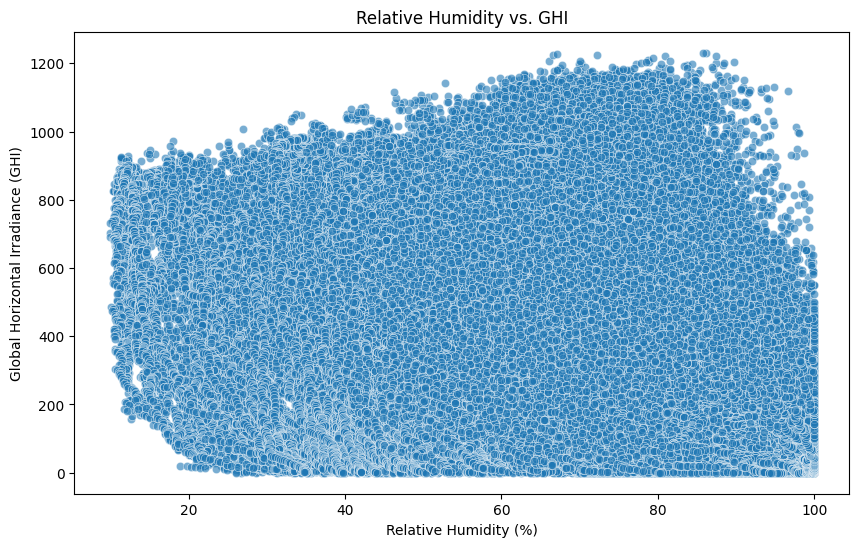

In [23]:
# Scatter plot to observe the relationship between RH and GHI
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RH'], y=data['GHI'], alpha=0.6)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Relative Humidity vs. GHI')
plt.show()


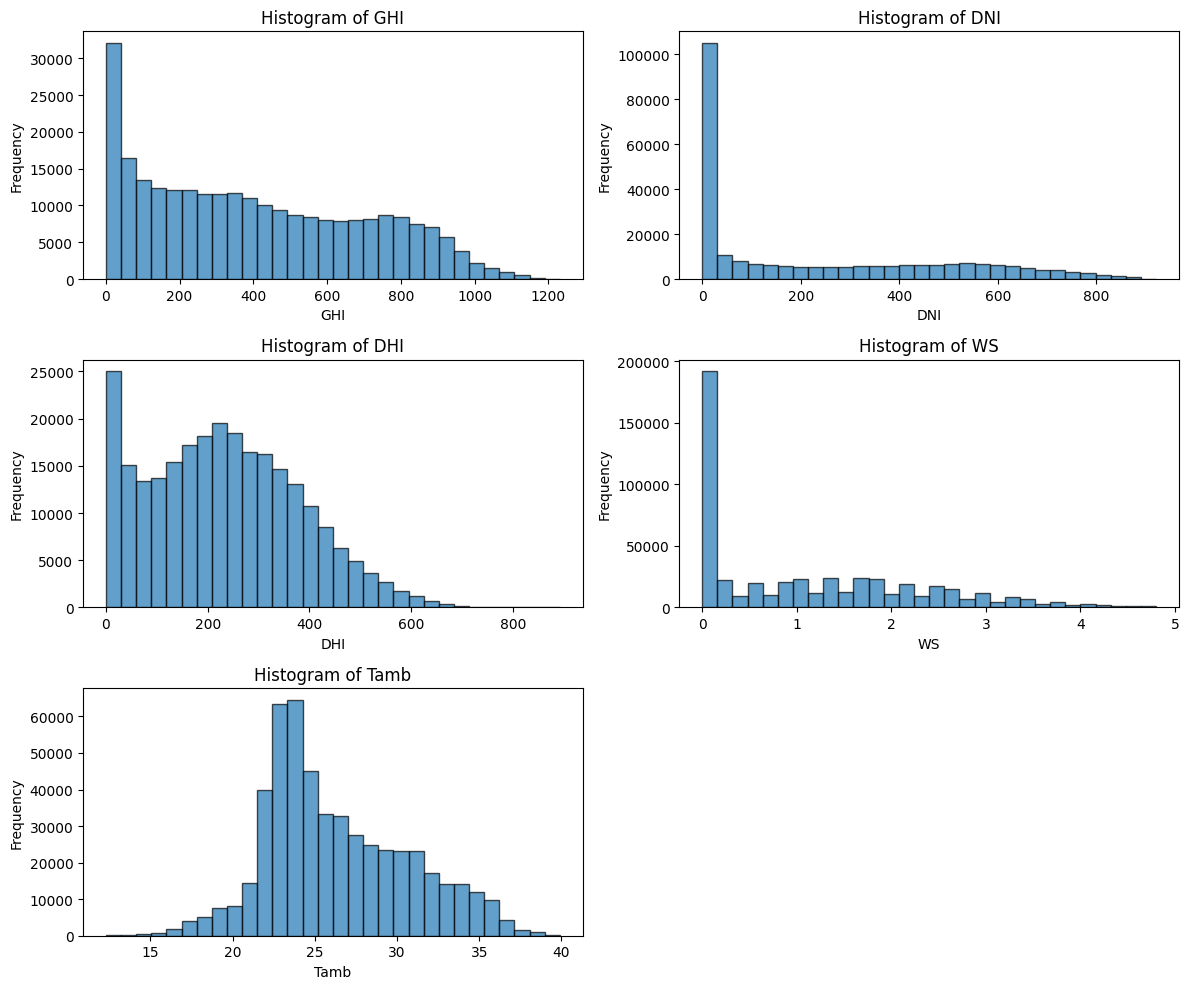

In [24]:
# Variables to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Create histograms for each variable
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    plt.hist(data[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [25]:
from scipy.stats import zscore
import pandas as pd

# Select columns for Z-Score analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the selected columns
z_scores = data[columns_to_analyze].apply(zscore)

# Flag data points with Z-scores greater than 3 or less than -3 as outliers
outliers = (z_scores.abs() > 3)

# Add an 'Outlier' column to indicate if any column is an outlier
data['Outlier'] = outliers.any(axis=1)

# Summary: Count of outliers per column
outlier_summary = outliers.sum()

print("Outlier Count per Column:")
print(outlier_summary)

# Display a few outlier rows
print("\nSample Outliers:")
print(data[data['Outlier']].head())


Outlier Count per Column:
GHI          0
DNI          0
DHI          0
ModA        76
ModB       489
WS        1407
WSgust    1395
dtype: int64

Sample Outliers:
                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-10-30 11:05:00  1009.0  560.6  524.8  1070.0  1046.0  26.3  82.9  0.2   
2021-10-30 11:07:00  1010.0  587.6  498.5  1075.0  1051.0  26.4  83.5  1.2   
2021-10-30 11:08:00  1004.0  576.2  501.1  1072.0  1048.0  26.6  84.1  0.8   
2021-10-30 11:10:00  1007.0  564.3  513.2  1076.0  1052.0  26.9  83.6  0.5   
2021-10-30 11:40:00  1028.0  815.0  290.0  1087.0  1064.0  27.6  77.6  1.2   

                     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  \
Timestamp                                                              
2021-10-30 11:05:00     1.4      0.4  172.3     14.9  1002         0   
2021-10-30 11:07:00     1.6      0.4  197.7      6.7  1002         0   
202

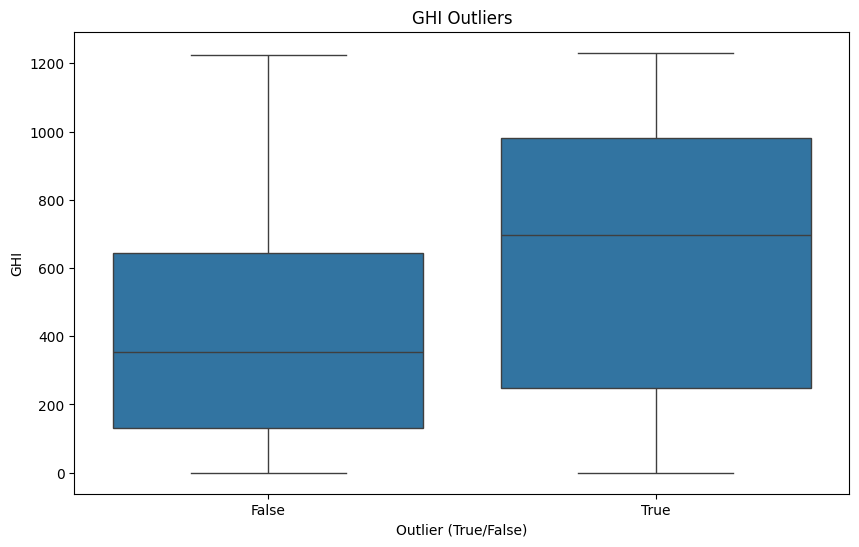

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for GHI with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Outlier'], y=data['GHI'])
plt.title('GHI Outliers')
plt.xlabel('Outlier (True/False)')
plt.ylabel('GHI')
plt.show()


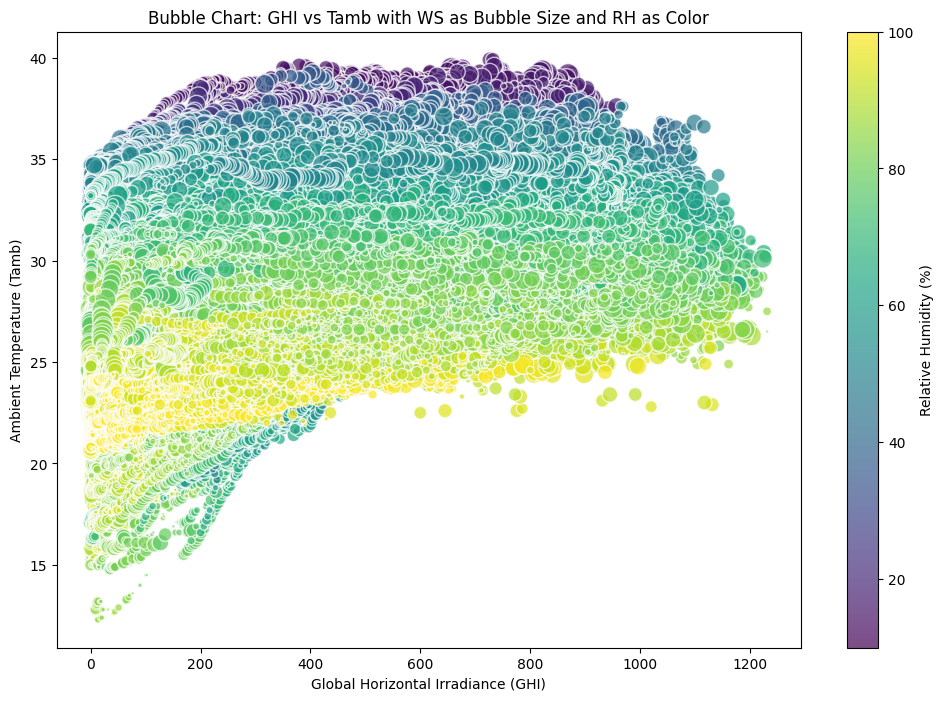

In [27]:
import matplotlib.pyplot as plt

# Bubble chart: GHI vs Tamb, bubble size = WS, color = RH
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x=data['GHI'],
    y=data['Tamb'],
    s=data['WS'] * 50,  # Scale bubble size
    c=data['RH'],  # Color based on RH
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency for better visibility
    edgecolors="w",  
)

plt.colorbar(bubble, label='Relative Humidity (%)')  # Add color bar
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb with WS as Bubble Size and RH as Color')
plt.show()


In [28]:
# Drop the 'Comments' column if it exists and is entirely null
if 'Comments' in data.columns:
    if data['Comments'].isnull().all():
        data.drop(columns=['Comments'], inplace=True)
        print("Dropped 'Comments' column as it contains only null values.")
else:
    print("'Comments' column does not exist in the DataFrame.")

# Fill missing values for GHI, DNI, and DHI with their respective column means
for column in ['GHI', 'DNI', 'DHI']:
    if column in data.columns:
        data[column] = data[column].fillna(data[column].mean())

# Ensure no negative values in specific columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
columns_to_check = [col for col in columns_to_check if col in data.columns]  # Check for existence
data[columns_to_check] = data[columns_to_check].clip(lower=0)

# Verify data cleaning
print("Remaining Missing Values:")
print(data.isnull().sum())

print("Sample Cleaned Data:")
print(data.head())


Dropped 'Comments' column as it contains only null values.
Remaining Missing Values:
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Outlier          0
dtype: int64
Sample Cleaned Data:
                            GHI        DNI         DHI  ModA  ModB  Tamb  \
Timestamp                                                                  
2021-10-30 00:01:00  400.707478  231.60065  231.748723   0.0   0.0  21.9   
2021-10-30 00:02:00  400.707478  231.60065  231.748723   0.0   0.0  21.9   
2021-10-30 00:03:00  400.707478  231.60065  231.748723   0.0   0.0  21.9   
2021-10-30 00:04:00  400.707478    0.00000  231.748723   0.0   0.0  21.9   
2021-10-30 00:05:00  400.707478  231.60065  231.748723   0.0   0.0  21.9   

      